# Credit Card fraud Detection EDA + Regression

Credit card fraud is an inclusive term for fraud committed using a payment card, such as a credit card or debit card. The purpose may be to obtain goods or services or to make payment to another account, which is controlled by a criminal. The Payment Card Industry Data Security Standard (PCI DSS) is the data security standard created to help financial institutions process card payments securely and reduce card fraud.

Credit card fraud can be authorised, where the genuine customer themselves processes a payment to another account which is controlled by a criminal, or unauthorised, where the account holder does not provide authorisation for the payment to proceed and the transaction is carried out by a third party. In 2018, unauthorised financial fraud losses across payment cards and remote banking totalled £844.8 million in the United Kingdom. Whereas banks and card companies prevented £1.66 billion in unauthorised fraud in 2018. That is the equivalent to £2 in every £3 of attempted fraud being stopped.

Credit cards are more secure than ever, with regulators, card providers and banks taking considerable time and effort to collaborate with investigators worldwide to ensure fraudsters aren't successful. Cardholders' money is usually protected from scammers with regulations that make the card provider and bank accountable. The technology and security measures behind credit cards are becoming increasingly sophisticated making it harder for fraudsters to steal money.

**Importing packages for Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Importing the csv file**

In [2]:
df= pd.read_csv('../input/creditcardfraud/creditcard.csv')

**Top five rows of the dataset**

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Finding out if there are any null value**

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* No null value exists

**Descriptive statistics of the data**

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Setting an index**

In [6]:
a=np.arange(1,284808)

**Distribution of the presence of fraud and no fraud data**

0 - No Fraud

1 - Fraud

Text(0.5, 0, 'Class')

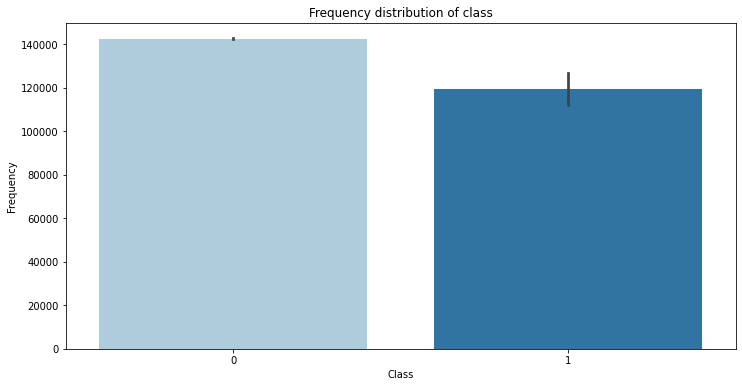

In [7]:
ax=plt.figure(figsize=(12,6))
sb.barplot(x='Class',y=a,data=df,palette='Paired')
plt.title('Frequency distribution of class')
plt.ylabel('Frequency')
plt.xlabel('Class')

* There are more non fraud values

**Correlation of various columns shown by heatmap**

<AxesSubplot:>

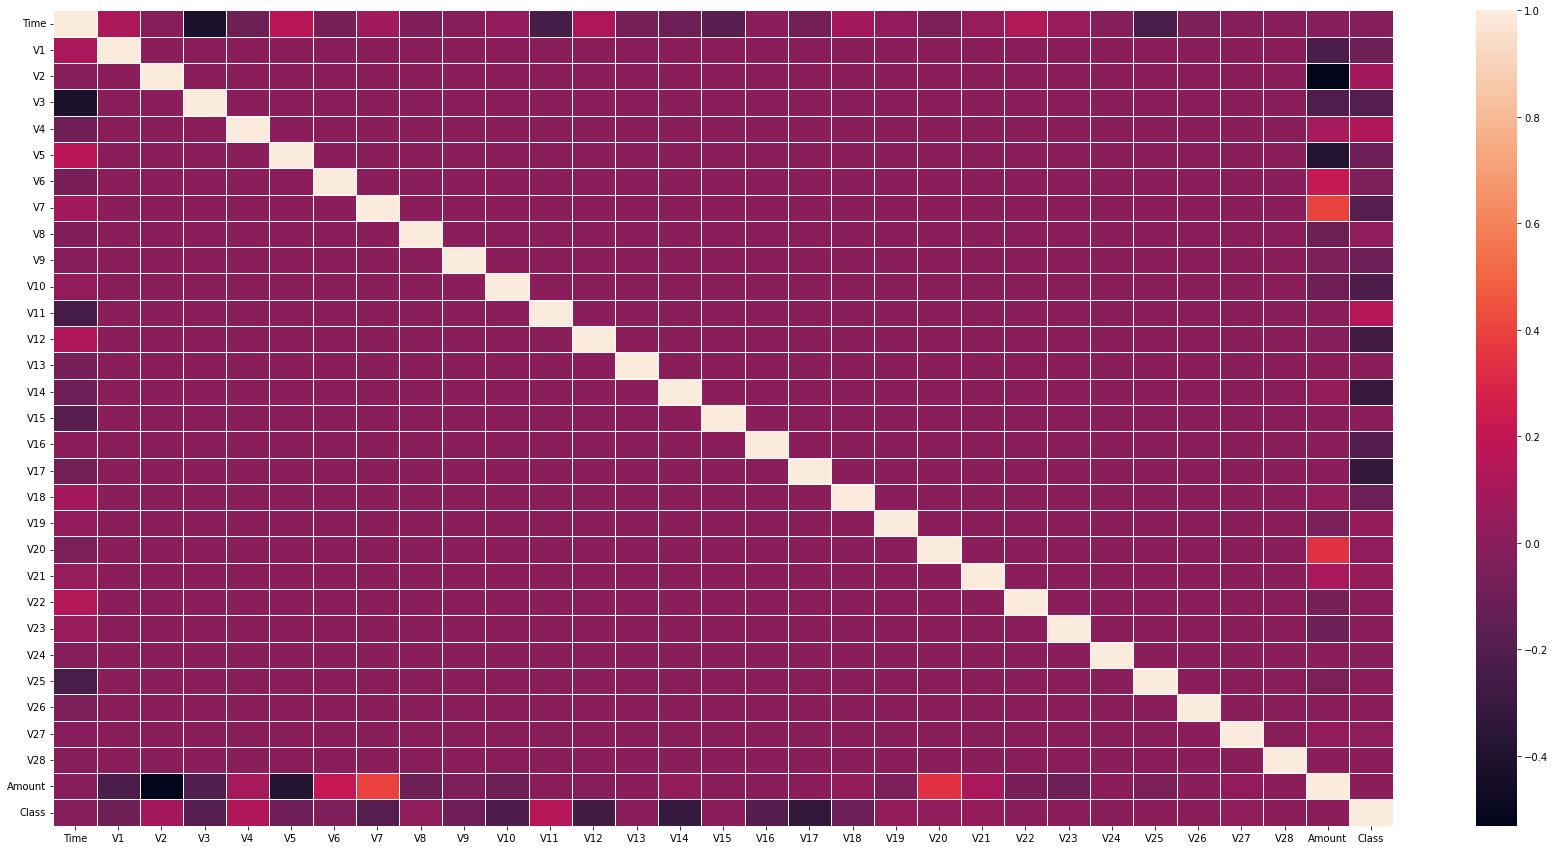

In [8]:
ax=plt.figure(figsize=(30,15))
df_corr=df.corr()
sb.heatmap(df_corr,linewidths=1,linecolor='white')

**Findidng out the percentage of fraud and no fraud values**

In [9]:
fraud=df['Class'].value_counts()
fraud_percentage= (fraud/284807)*100
fraud_percentage

0    99.827251
1     0.172749
Name: Class, dtype: float64

* 0.173% values are found to fraud

**Assigning the amount column as independant(X) and clas as dependant(y) variables**

In [10]:
X=df['Amount']
y=df['Class']

**Reshaping the Amount column to 2D**

In [11]:
X=X.values.reshape(-1,1)

**Amount taken with seconds elapsed between each transaction and the first transaction in the dataset**

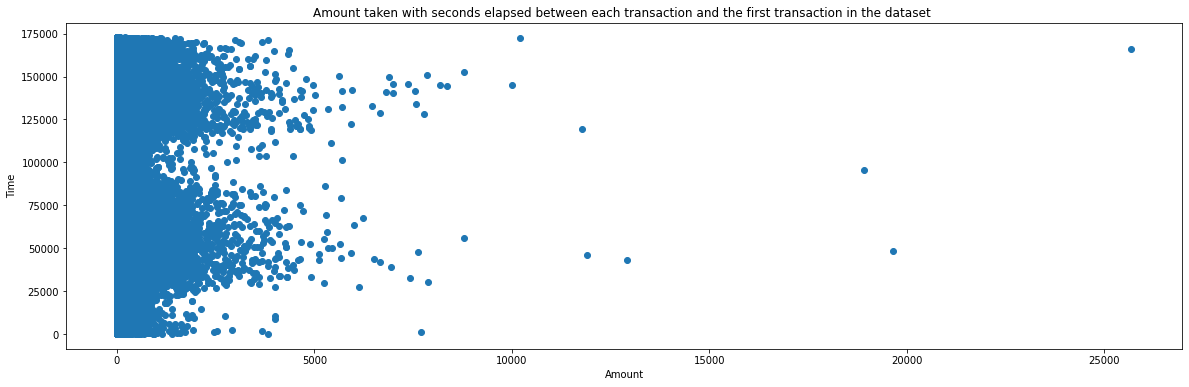

In [12]:
fig,ax=plt.subplots(figsize=(20,6))
ax.scatter(X,df['Time'])
plt.title('Amount taken with seconds elapsed between each transaction and the first transaction in the dataset ')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

**Importing the Standard Scaler for standardising the values**

In [13]:
from sklearn.preprocessing  import StandardScaler
sdc= StandardScaler()

In [14]:
df_scaled = pd.DataFrame(sdc.fit_transform(df), columns=df.columns)

**Importing train test split from sklearn**

In [15]:
from sklearn.model_selection import train_test_split

**80% - Training Value**

**20% - Testing Value**

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Importing Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()

**Fitting the values into Logistic Regression**

In [19]:
lr.fit(X_train, y_train)

LogisticRegression()

**Predicting the Values fitted**

In [20]:
pred=lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

**Importing Confusion Matrix to evaluating the performance of a classification model**

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[56864,     0],
       [   98,     0]])

**Finding out the accuracy of the model**

In [22]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred)
score*100

99.82795547909133

* The model has 99.83% accuracy

# Thank You